<a href="https://colab.research.google.com/github/CodeeDharani/Genetics-Disorder/blob/main/Intro_to_Gene_Classification_from_DNA_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import Bio
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
sns.set()

In [6]:
!pip install bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.6 MB/s eta 0:00:00


In [8]:
import Bio

In [9]:
humandata = pd.read_table('/content/drive/MyDrive/human_data.txt')
humandata.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [10]:
humandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


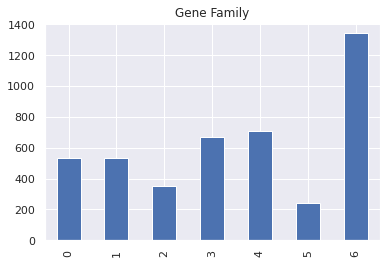

In [11]:
## 4380 Sequences are there
humandata['class'].value_counts().sort_index().plot.bar()
plt.title("Gene Family")
plt.show()

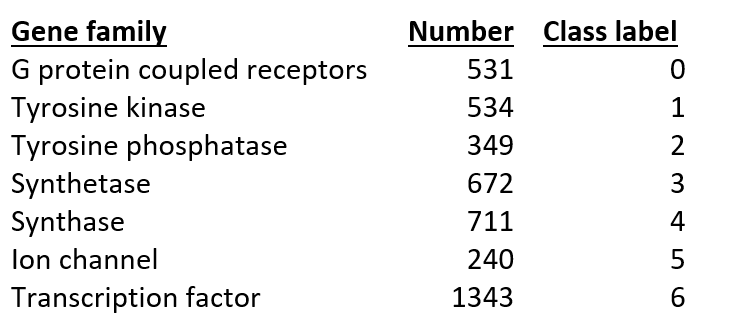

In [12]:
Image('/content/drive/MyDrive/_results_.png')

In [13]:
display(humandata["sequence"][0])

print(f'length of Sequence 1 : {len(humandata["sequence"][0])}')

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

length of Sequence 1 : 207


In [14]:
from Bio.Seq import Seq
my_seq = Seq(humandata["sequence"][0])
print(my_seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [15]:
print(f" Complement : {my_seq.complement()} \n")
print(f"Reverse Complement :  {my_seq.reverse_complement()} " )

 Complement : TACGGGGTTGATTTATGATGGCATACCGGGTGGTATTAATGGGGGTATGAGGAATGTGATAAGGAGTAGTGGGTTGATTTTTATAATTTGTGTTTGATGGTGGATGGAGGGAGTGGTTTCGGGTATTTTTATTTTTTAATATTGTTTGGGACTCTTGGTTTTACTTGCTTTTAGACAAGCGAAGTAAGTAACGGGGGTGTTAGGATC 

Reverse Complement :  CTAGGATTGTGGGGGCAATGAATGAAGCGAACAGATTTTCGTTCATTTTGGTTCTCAGGGTTTGTTATAATTTTTTATTTTTATGGGCTTTGGTGAGGGAGGTAGGTGGTAGTTTGTGTTTAATATTTTTAGTTGGGTGATGAGGAATAGTGTAAGGAGTATGGGGGTAATTATGGTGGGCCATACGGTAGTATTTAGTTGGGGCAT 


In [16]:
from Bio.SeqUtils import GC
print("GC% :\t" + str(GC(my_seq)))

GC% :	39.61352657004831


/usr/local/lib/python3.8/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [17]:
humandata["length"] = humandata.sequence.apply(lambda x : len(x))  # finding the length of each DNA Sequence

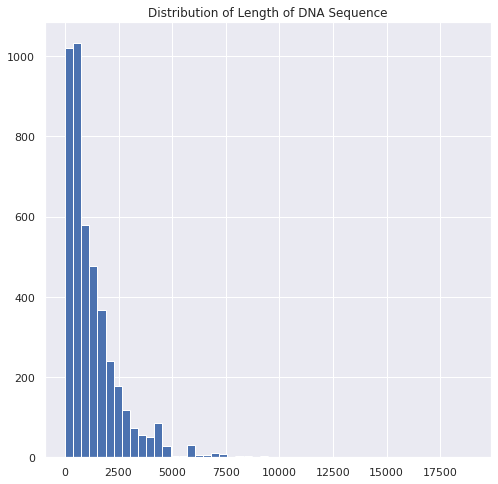

In [18]:
plt.figure(figsize=(8,8));
plt.hist(humandata["length"],bins=50)
plt.title("Distribution of Length of DNA Sequence");

In [19]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]


In [20]:
#Now we can convert our training data sequences into short overlapping k-mers of legth 6.

humandata['words'] = humandata.apply(lambda x: getKmers(x['sequence']), axis=1)

In [21]:
humandata.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC..."


In [22]:
#We are now going to Convert the words into string and then apply Count Vectorizer

humandata["in_string"] =humandata["words"].apply(lambda x:  ' '.join(x))

In [23]:
humandata[["words","in_string"]]


,words,in_string
0,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
...,...,...
4375,"[ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...",ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378,"[ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...",ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...


In [24]:
y=humandata.loc[:,'class'].values

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(humandata["in_string"])

In [26]:
print(X.shape)


(4380, 232414)


In [27]:
#This is the Count_Vectorizer's Vocabulary
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


In [28]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

In [29]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [30]:
print("Decision Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y[train_index])
    pred=dt.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Decision Classifier :
0 Iteration : Accuracy = 0.80822     F1_Score = 0.81252
1 Iteration : Accuracy = 0.81507     F1_Score = 0.81769
2 Iteration : Accuracy = 0.80023     F1_Score = 0.80566
3 Iteration : Accuracy = 0.81507     F1_Score = 0.82070
4 Iteration : Accuracy = 0.80365     F1_Score = 0.80744


In [31]:
## Used Grid Search to find the best Hyperparameters. 
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


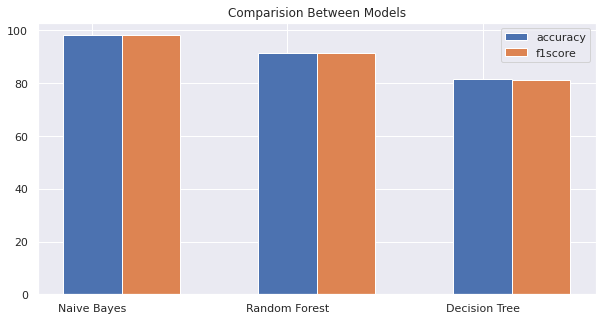

In [32]:
#scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree"]
accscore=[98.059,91.4,81.5]
f1score=[98.061,91.5,81.1]
w=0.3
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state=42)
nb_ =MultinomialNB(alpha=0.01)
nb_.fit(X_train, y_train)

y_pred = nb_.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    0   0    3
1           0  100   0    0    0   0    6
2           0    0  78    0    0   0    0
3           0    0   0  122    0   0    3
4           0    0   0    0  143   0    6
5           0    0   0    0    0  51    0
6           0    0   0    0    0   0  265


In [34]:
import pickle

In [35]:
# Saving the model for future use.
filename = 'finalized_model.sav'
pickle.dump(nb_, open(filename, 'wb'))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

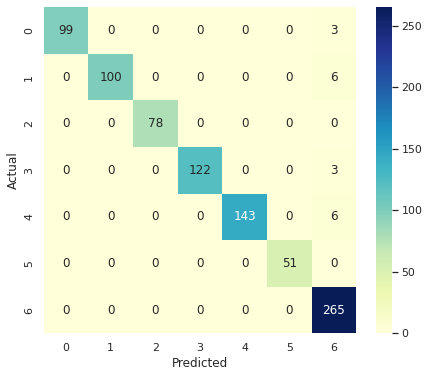

In [36]:
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(4,4))
X_tf = tf.fit_transform(humandata["in_string"])

In [38]:
i=0
for key,value in tf.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


In [39]:
print("Naive Bayes Classifier for TFidf:")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X_tf,y)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier for TFidf:
0 Iteration : Accuracy = 0.98059    F1_Score = 0.98061
1 Iteration : Accuracy = 0.98059    F1_Score = 0.98066
2 Iteration : Accuracy = 0.97603    F1_Score = 0.97606
3 Iteration : Accuracy = 0.97717    F1_Score = 0.97722
4 Iteration : Accuracy = 0.97717    F1_Score = 0.97715


In [40]:
print("Random Forest Classifier for Tfidf :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=5,shuffle=True,random_state=42).split(X_tf,y)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier for Tfidf :
0 Iteration : Accuracy = 0.91096     F1_Score = 0.91235
1 Iteration : Accuracy = 0.92237     F1_Score = 0.92335
2 Iteration : Accuracy = 0.89269     F1_Score = 0.89604
3 Iteration : Accuracy = 0.92237     F1_Score = 0.92322
4 Iteration : Accuracy = 0.90868     F1_Score = 0.91055


In [41]:
import pandas as pd

In [42]:
chimp = pd.read_table('/content/drive/MyDrive/chimp_data.txt')
dog = pd.read_table('/content/drive/MyDrive/dog_data.txt')
chimp.head()
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [43]:
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)

In [44]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_c = chimp.iloc[:, 1].values                       # y_c for chimp

dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_d = dog.iloc[:, 1].values  

In [45]:
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)


In [46]:
print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


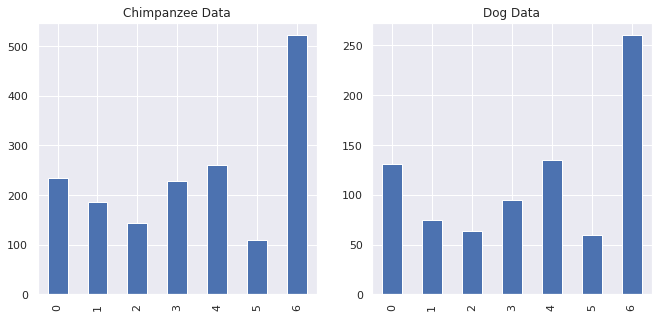

In [47]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
chimp['class'].value_counts().sort_index().plot.bar()
plt.title("Chimpanzee Data");
plt.subplot(1,2,2)
dog['class'].value_counts().sort_index().plot.bar()
plt.title("Dog Data");

In [48]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = nb_.predict(X_chimp)
y_pred_dog = nb_.predict(X_dog)

In [49]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_c, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_c, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          231    0    0    0    0    0    3
1            0  179    0    0    0    0    6
2            0    0  144    0    0    0    0
3            0    0    0  225    0    0    3
4            1    0    0    0  253    0    7
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.988 
precision = 0.989 
recall = 0.988 
f1 = 0.988


In [50]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_d, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_d, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          124   0   0   0    0   0    7
1            0  52   0   0    0   0   23
2            0   0  43   0    0   0   21
3            1   0   0  64    1   0   29
4            0   0   0   0  110   0   25
5            0   0   0   0    0  40   20
6            0   0   0   0    0   0  260
accuracy = 0.845 
precision = 0.894 
recall = 0.845 
f1 = 0.847
